In [101]:
import pandas as pd
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
import io
from scipy import misc
from sklearn.tree import export_graphviz
%matplotlib inline
from datascience import *

In [102]:
data = pd.read_csv('C:/Users/burakalbayrak/Desktop/features.csv')
data2= pd.read_csv('C:/Users/burakalbayrak/Desktop/labels.csv')

In [103]:
data.describe()

,Ax_0,Ax_1,Ax_2,Ax_3,Ax_4,Ax_5,Ax_6,Ax_7,Ax_8,Ax_9,...,Stretch_FFT9,Stretch_FFT10,Stretch_FFT11,Stretch_FFT12,Stretch_FFT13,Stretch_FFT14,Stretch_FFT15,min,max,Durahmn
count,4.740000e+03,4.740000e+03,4.740000e+03,4.740000e+03,4.740000e+03,4.740000e+03,4.740000e+03,4.740000e+03,4.740000e+03,4.740000e+03,...,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,8.412658e-08,-4.536329e-07,-8.028395e-07,-3.347511e-07,-9.498333e-08,-1.186603e-07,8.886076e-09,5.258565e-07,4.736114e-07,4.631350e-07,...,0.005003,0.004871,0.011130,0.007399,0.010843,-0.001757,0.009373,0.012271,0.029563,2.029355
std,1.916484e+00,1.923344e+00,1.877065e+00,1.730578e+00,1.619586e+00,1.559772e+00,1.578301e+00,1.629580e+00,1.682801e+00,1.726249e+00,...,0.238148,0.255522,0.320237,0.334088,0.388072,0.376867,0.453355,0.215523,0.249376,0.809689
min,-1.697700e+01,-1.656600e+01,-1.345900e+01,-1.197500e+01,-1.100200e+01,-1.007500e+01,-1.392100e+01,-1.083900e+01,-1.389100e+01,-1.442000e+01,...,-0.151600,-0.185220,-0.195380,-0.230300,-0.237530,-0.269020,-0.274020,-0.299260,-0.194880,0.423000
25%,-8.509400e-01,-8.307125e-01,-7.426275e-01,-6.491075e-01,-5.619900e-01,-5.586300e-01,-6.814325e-01,-7.678200e-01,-8.577275e-01,-9.826725e-01,...,-0.144055,-0.177528,-0.185400,-0.219495,-0.223857,-0.255950,-0.257742,-0.161240,-0.121530,1.202000
50%,1.054700e-02,4.716400e-02,9.722650e-02,9.138750e-02,7.554700e-02,3.378550e-02,-1.829550e-02,-2.256050e-02,-2.272200e-02,-5.661350e-02,...,-0.090346,-0.098437,-0.111895,-0.122400,-0.150895,-0.159695,-0.179350,-0.020398,-0.072910,2.109100
75%,6.754200e-01,6.906550e-01,7.092050e-01,6.258500e-01,5.838000e-01,5.604950e-01,5.716675e-01,6.887175e-01,7.539500e-01,7.540550e-01,...,0.048710,0.100089,0.077072,0.094702,0.083304,0.111110,0.107610,0.176787,0.015612,2.888700
max,1.404700e+01,1.436700e+01,1.105300e+01,1.161700e+01,9.958900e+00,1.279700e+01,1.191500e+01,1.425400e+01,8.961400e+00,1.849800e+01,...,2.121200,1.836100,3.242200,3.141600,4.092500,3.037900,5.040100,1.114900,1.290000,4.286300


In [104]:
data.head()

,Ax_0,Ax_1,Ax_2,Ax_3,Ax_4,Ax_5,Ax_6,Ax_7,Ax_8,Ax_9,...,Stretch_FFT9,Stretch_FFT10,Stretch_FFT11,Stretch_FFT12,Stretch_FFT13,Stretch_FFT14,Stretch_FFT15,min,max,Durahmn
0,0.263050,0.34333,0.540720,0.66524,0.70336,0.672450,0.65456,0.41186,1.766400,0.88332,...,-0.094065,-0.14707,-0.16677,-0.19605,-0.17088,-0.19869,-0.17892,-0.18767,-0.14610,1.7514
1,0.251630,0.42848,0.676500,0.76928,0.56022,0.119130,-0.96811,-0.45402,-0.081187,-0.14030,...,-0.111640,-0.14933,-0.12288,-0.20493,-0.18245,-0.19428,-0.18074,-0.15638,-0.14145,1.3239
2,0.171880,0.53016,0.303300,0.18171,0.25325,-0.624500,-1.32760,0.44171,-0.973040,0.76569,...,-0.109750,-0.16589,-0.14611,-0.20021,-0.20942,-0.24763,-0.26071,-0.16107,-0.14430,1.2813
3,0.063667,0.18942,0.335130,0.52145,0.68117,0.093744,-1.15320,-1.37180,1.202300,0.62273,...,-0.118590,-0.13699,-0.18876,-0.18770,-0.15824,-0.19013,-0.19213,-0.16790,-0.14244,1.4471
4,-0.098419,0.41142,-0.036533,-0.54399,0.92680,-0.478430,-0.24238,1.50430,0.729390,1.29030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
my_list = data2["Label"].values
new_list=[]
dictionary={1:'Jump',2:'Lie Down',3:'Sit',4:'Stand',5:'Walk',6:'Stairs up',7:'Stairs down',8:'Transition'}
for i in range(len(my_list)):
    new_list.append(dictionary[my_list[i]])

In [106]:
data['Label'] = new_list 

In [107]:
data=data.dropna()


In [109]:
data.head()

,Ax_0,Ax_1,Ax_2,Ax_3,Ax_4,Ax_5,Ax_6,Ax_7,Ax_8,Ax_9,...,Stretch_FFT10,Stretch_FFT11,Stretch_FFT12,Stretch_FFT13,Stretch_FFT14,Stretch_FFT15,min,max,Durahmn,Label
0,0.263050,0.34333,0.54072,0.66524,0.70336,0.672450,0.65456,0.41186,1.766400,0.88332,...,-0.147070,-0.166770,-0.196050,-0.170880,-0.19869,-0.178920,-0.18767,-0.14610,1.7514,Walk
1,0.251630,0.42848,0.67650,0.76928,0.56022,0.119130,-0.96811,-0.45402,-0.081187,-0.14030,...,-0.149330,-0.122880,-0.204930,-0.182450,-0.19428,-0.180740,-0.15638,-0.14145,1.3239,Walk
2,0.171880,0.53016,0.30330,0.18171,0.25325,-0.624500,-1.32760,0.44171,-0.973040,0.76569,...,-0.165890,-0.146110,-0.200210,-0.209420,-0.24763,-0.260710,-0.16107,-0.14430,1.2813,Walk
3,0.063667,0.18942,0.33513,0.52145,0.68117,0.093744,-1.15320,-1.37180,1.202300,0.62273,...,-0.136990,-0.188760,-0.187700,-0.158240,-0.19013,-0.192130,-0.16790,-0.14244,1.4471,Walk
5,0.155040,0.35213,0.54430,0.57315,0.56082,0.534930,0.51026,0.11107,-0.639800,0.95723,...,-0.021911,-0.012512,-0.075743,-0.027796,-0.13653,-0.072712,-0.17951,-0.14411,1.4468,Walk


In [110]:
train,test=train_test_split(data,test_size=0.15)

In [111]:
print ("Training size: {}; Test size:{}".format(len(train),len(test)))

Training size: 2040; Test size:360


In [112]:
#row and column numbers
train.shape

(2040, 121)

In [113]:
c=DecisionTreeClassifier(min_samples_split=100)

In [114]:
features=['Ax_0', 'Ax_1', 'Ax_2', 'Ax_3', 'Ax_4', 'Ax_5', 'Ax_6', 'Ax_7', 'Ax_8', 'Ax_9', 'Ax_10', 'Ax_11', 'Ax_12', 'Ax_13', 'Ax_14', 'Ax_15', 'Ax_16', 'Ax_17', 'Ax_18', 'Ax_19', 'Ax_20', 'Ax_21', 'Ax_22', 'Ax_23', 'Ax_24', 'Ax_25', 'Ax_26', 'Ax_27', 'Ax_28', 'Ax_29', 'Ax_30', 'Ax_31', 'Ay_0', 'Ay_1', 'Ay_2', 'Ay_3', 'Ay_4', 'Ay_5', 'Ay_6', 'Ay_7', 'Ay_8', 'Ay_9', 'Ay_10', 'Ay_11', 'Ay_12', 'Ay_13', 'Ay_14', 'Ay_15', 'Ay_16', 'Ay_17', 'Ay_18', 'Ay_19', 'Ay_20', 'Ay_21', 'Ay_22', 'Ay_23', 'Ay_24', 'Ay_25', 'Ay_26', 'Ay_27', 'Ay_28', 'Ay_29', 'Ay_30', 'Ay_31', 'Az_mean', 'BA_DWT_0', 'BA_DWT_1', 'BA_DWT_2', 'BA_DWT_3', 'BA_DWT_4', 'BA_DWT_5', 'BA_DWT_6', 'BA_DWT_7', 'BA_DWT_8', 'BA_DWT_9', 'BA_DWT_10', 'BA_DWT_11', 'BA_DWT_12', 'BA_DWT_13', 'BA_DWT_14', 'BA_DWT_15', 'BA_DWT_16', 'BA_DWT_17', 'BA_DWT_18', 'BA_DWT_19', 'BA_DWT_20', 'BA_DWT_21', 'BA_DWT_22', 'BA_DWT_23', 'BA_DWT_24', 'BA_DWT_25', 'BA_DWT_26', 'BA_DWT_27', 'BA_DWT_28', 'BA_DWT_29', 'BA_DWT_30', 'BA_DWT_31', 'var_1', 'var_2', 'var_3', 'var_4', 'Stretch_FFT0', 'Stretch_FFT1', 'Stretch_FFT2', 'Stretch_FFT3', 'Stretch_FFT4', 'Stretch_FFT5', 'Stretch_FFT6', 'Stretch_FFT7', 'Stretch_FFT8', 'Stretch_FFT9', 'Stretch_FFT10', 'Stretch_FFT11', 'Stretch_FFT12', 'Stretch_FFT13', 'Stretch_FFT14', 'Stretch_FFT15', 'min', 'max', 'Durahmn']


In [115]:
x_train=train[features]
y_train=train["Label"]


x_test=test[features]
y_test=test["Label"]



In [116]:
dt=c.fit(x_train,y_train)

In [117]:
def show_tree(tree,features,path):
    for i in range(100):
        f=io.StringIO()
        export_graphviz(tree, out_file=f, feature_names=features)
        pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
        img=misc.imread(path)
        plt.rcParams["figure.figsize"]=(20,20)
        plt.imshow(img)
        

C:\Users\burakalbayrak\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


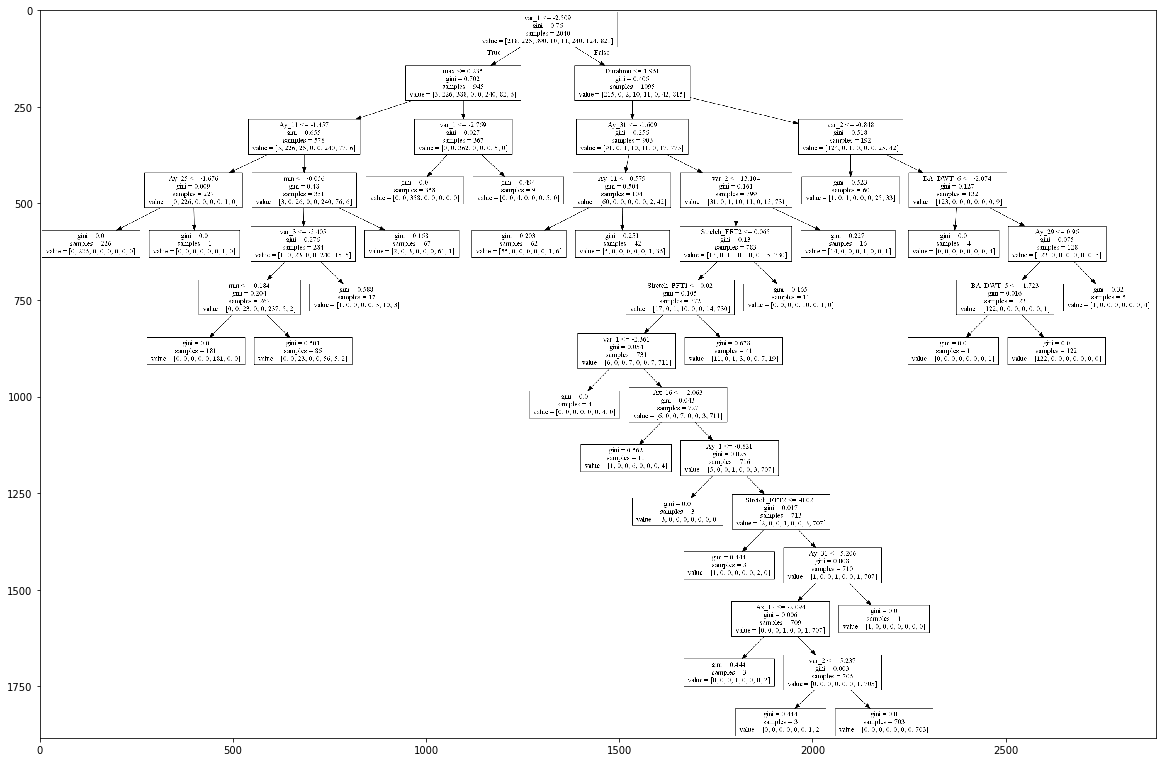

In [118]:
show_tree(dt,features,'dec_tree_feat_05.png')

In [119]:
y_pred=c.predict(x_test)

In [87]:
y_pred

array([3, 2, 5, 3, 5, 5, 4, 5, 2, 5, 5, 5, 5, 1, 5, 5, 4, 5, 2, 3, 3, 5,
       3, 3, 2, 5, 2, 2, 1, 5, 5, 1, 2, 4, 5, 5, 4, 5, 2, 2, 3, 1, 8, 8,
       3, 5, 5, 5, 5, 5, 5, 5, 4, 3, 5, 5, 5, 1, 1, 8, 8, 3, 5, 1, 5, 5,
       4, 8, 5, 3, 3, 3, 5, 5, 5, 8, 5, 5, 5, 5, 5, 5, 2, 1, 8, 5, 3, 5,
       5, 2, 3, 5, 8, 1, 1, 1, 5, 4, 5, 8, 5, 5, 5, 2, 4, 3, 5, 1, 1, 3,
       4, 1, 5, 5, 5, 4, 8, 5, 5, 4, 5, 3, 5, 5, 3, 1, 2, 5, 3, 5, 2, 4,
       1, 3, 1, 5, 3, 5, 5, 4, 1, 3, 5, 5, 5, 5, 4, 5, 4, 2, 8, 1, 8, 3,
       1, 5, 3, 5, 5, 5, 1, 8, 3, 5, 3, 5, 1, 2, 5, 3, 5, 5, 1, 5, 4, 5,
       4, 1, 5, 5, 1, 1, 3, 1, 5, 5, 2, 1, 8, 5, 3, 5, 1, 3, 5, 3, 5, 4,
       2, 2, 5, 8, 3, 5, 3, 3, 4, 1, 8, 2, 5, 1, 2, 5, 4, 8, 1, 5, 3, 3,
       1, 1, 3, 1, 4, 5, 4, 2, 3, 1, 4, 5, 3, 5, 5, 1, 3, 5, 1, 2, 1, 7,
       5, 5, 5, 5, 8, 2, 4, 5, 3, 5, 5, 1, 5, 5, 3, 5, 5, 5, 2, 1, 4, 2,
       1, 5, 5, 3, 2, 5, 4, 5, 1, 8, 8, 5, 5, 3, 5, 2, 4, 1, 5, 8, 5, 5,
       1, 2, 4, 5, 3, 3, 5, 5, 3, 5, 3, 3, 4, 3, 3,

In [88]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)*100

In [89]:
print ('Accuracy using Decision Tree :', round(score,1), "%")

Accuracy using Decision Tree : 90.0 %
